## DBSCAN Clustering 


### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  

### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook:

- introduces DBSCAN clustering using features from the Iris flower dataset 

In [78]:
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import DBSCAN


In [79]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth'] 

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

iris = x[['SepalLength', 'PetalLength']]

We fit the model with ɛ=0.5 and  min_samples=5 considering two attributes of the iris dataset ( e.g SepalLength and PetalLength).
- ɛ : the radius of our neighborhoods around a data point p.
- min_samples: The minimum number of data points we want in a neighborhood to define a cluster.

In [80]:
dbscan = DBSCAN()
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [83]:
dbscan.fit(iris)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

The following figure plots the model. It shows two "dense" clusters of points (red and green) and outliers (black). 

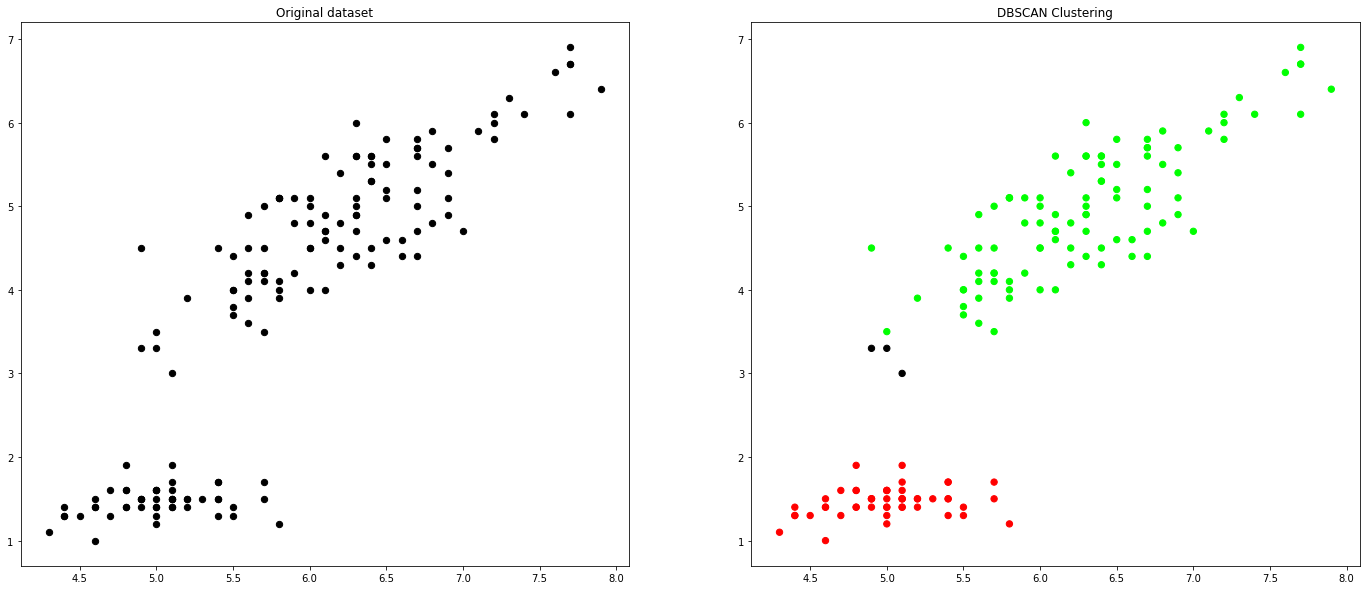

In [84]:
# Set the size of the plot
plt.figure(figsize=(24,10))

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])

# Plot Original
plt.subplot(1, 2, 1)
plt.scatter(x.SepalLength, x.PetalLength, c="K", s=40)
plt.title('Original dataset')

# Plot the Model

plt.subplot(1, 2, 2)
plt.scatter(x.SepalLength, x.PetalLength, c=colormap[dbscan.labels_], s=40)
plt.title('DBSCAN Clustering')


plt.show()


We compute the confusion matrix and calculate the purity metric.

In [85]:
def confusion(y,labels):
    cm = sm.confusion_matrix(y, labels)
    return cm


In [89]:
confusion(y, dbscan.labels_)

array([[ 0,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 3,  0, 47,  0],
       [ 0,  0, 50,  0]])

In [90]:
# Calculate purity 
def Purity(cm):
    M=[]
    S=0
    for i in cm:
        k = max(i)
        M.append(k)
    for i in M:
        S+=i
    Purity=S/150 
    return Purity


In [88]:
Purity(confusion(y, dbscan.labels_))

0.97999999999999998